## Cell-finder 3000

Fitting mutiple channels; will export to standalone

-This notebook can be used to gather information about fluorescence intensity from cells in a .tif file.

-It can be useful when analyzing transfection data. You can import an image/movie and use masking and segmentation functions to find cells that meet certain thresholds regarding size and their fluorescence. This fluorescence data can be quantified and graphed to see changes over time (if data is a movie).

-Originally created this refactored notebook using data from a transfection done on 4_15_22. It built upon the fit_multiple_channels notebook. We simplified the different steps into a singular function that was saved as celldetection_function.py. 


In [17]:
# import libraries for the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2


import sys
import numpy as np
import tifffile as tif
import matplotlib.pyplot
import ipywidgets
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import rcParams
import skimage
import scipy

#Set global path for files
sys.path.append('/home/ekrueger2/repos/celldetection')

#Import other relevant functions
import transients
import util
from cellpose import models 
import skimage.io
from skimage import exposure

model = models.Cellpose(gpu=False, model_type='cyto') #channels['channel3'].raw=channels['channel3'].raw+1e-4

import celldetection_function as cdf


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 0mM_Ca_Calcium_EGTA_Field3

In [18]:
# specify image file path, name, and channels

path = "/home/ekrueger2/microscopy_data/NFAT_translocation_and_relaxation/4_15_22/Time_Series/EGTA/0mM_Ca/"
fileNames = ["0mM_Ca_Calcium_EGTA_Field3.tif"]
channel_names = ["channel1"]

Code expects the time index to be the first entry. If this isn't the case, set timeReversed=True

In [26]:
#Do the cell segmentation

def entirething(path, fileNames, channel_names, minCellSize=600, display=False):
    channels= cdf.preparation(path, fileNames, channel_names)
    fileName = fileNames[0]
    imgs= cdf.util.ReadImg(path + fileName)
    masks= cdf.cellsegmentation(imgs, display=display)

    cdf.celldetectionanalysis(channels, masks)
    cdf.calciumtransients(channels,fileName=fileName, display=display)
    newTracesMap= cdf.screencells(channels,minCellSize=minCellSize,display=True)
    return newTracesMap

Reversing time index
Returning an array of size (121, 2040, 2040)


/home/ekrueger2/repos/celldetection/smc/celldetection_function.py:127: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indices=np.array(indices)


array([  2,   7,  12,  14,  15,  19,  25,  27,  30,  31,  40,  45,  47,
        49,  52,  53,  54,  56,  64,  66,  68,  69,  75,  76,  77,  80,
        84,  85,  86,  87,  88,  89,  93,  94,  96,  99, 100, 104, 107])

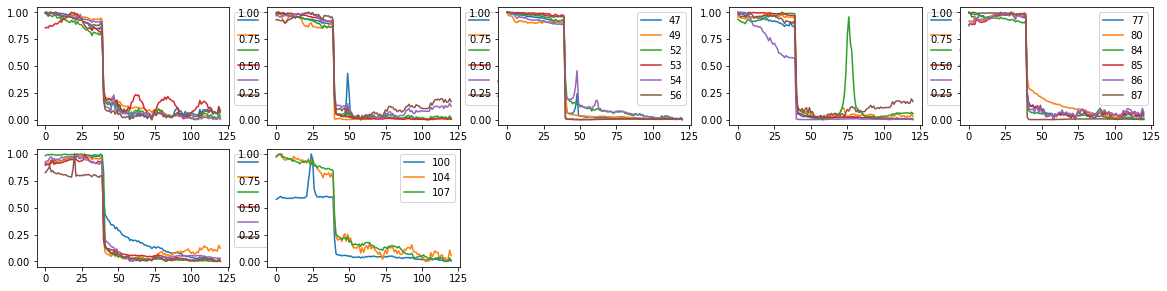

In [25]:
entirething(path, fileNames, channel_names, minCellSize=600)

# 0mM_Ca_NFAT_EGTA_Field3

In [27]:
# specify image file path, name, and channels
path = "/home/ekrueger2/microscopy_data/NFAT_translocation_and_relaxation/4_15_22/Time_Series/EGTA/0mM_Ca/"
fileNames = ["0mM_Ca_NFAT_EGTA_Field3.tif"]
channel_names = ["channel1"]

Reversing time index
Returning an array of size (121, 2040, 2040)


/home/ekrueger2/repos/celldetection/smc/celldetection_function.py:127: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indices=np.array(indices)


48


array([], dtype=int64)

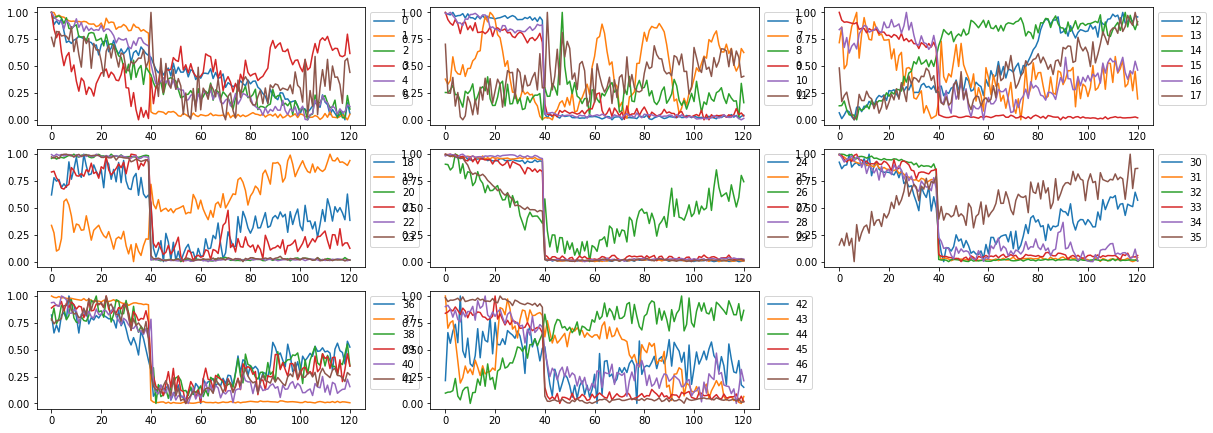

<Figure size 1440x720 with 0 Axes>

In [28]:
entirething(path, fileNames, channel_names, minCellSize=5, display=True)

# 0mM_Ca_Calcium_Iono_Field3

In [9]:
# specify image file path, name, and channels
path = "/home/ekrueger2/microscopy_data/NFAT_translocation_and_relaxation/4_15_22/Time_Series/Iono/0mM_Ca/"
fileNames = ["0mM_Ca_Calcium_Iono_Field3.tif"]
channel_names = ["channel1"]

Reversing time index
Returning an array of size (121, 2040, 2040)


/tmp/ipykernel_16720/1802976768.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indices=np.array(indices)


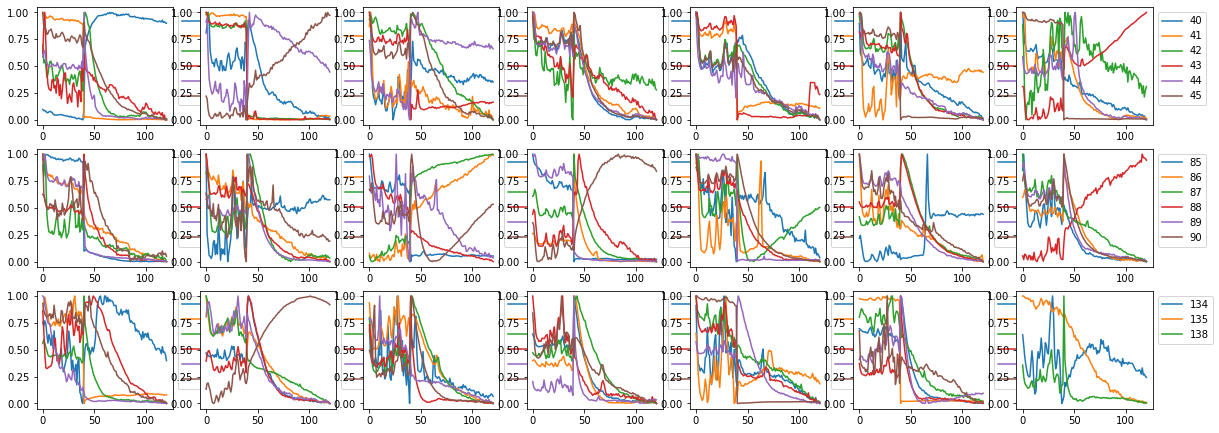

In [10]:
#Do the cell segmentation
channels= preparation(path, fileNames)
fileName = fileNames[0]
imgs=util.ReadImg(path + fileName)
masks= cellsegmentation(imgs, display=True)

celldetectionanalysis(channels, masks)
calciumtransients(channels,fileName=fileName)
newTracesMap= screencells(channels,minCellSize=600,display=True)

# 0mM_Ca_NFAT_Iono_Field3

In [9]:
# specify image file path, name, and channels
path = "/home/ekrueger2/microscopy_data/NFAT_translocation_and_relaxation/4_15_22/Time_Series/Iono/0mM_Ca/"
fileNames = ["0mM_Ca_NFAT_Iono_Field3.tif"]
channel_names = ["channel1"]

Reversing time index
Returning an array of size (121, 2040, 2040)


/tmp/ipykernel_16880/1802976768.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indices=np.array(indices)


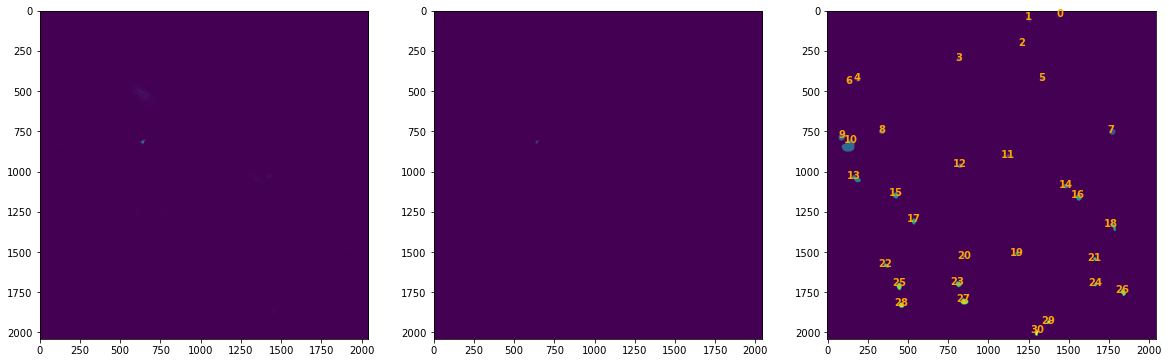

<Figure size 1440x720 with 0 Axes>

In [10]:
#Do the cell segmentation
channels= preparation(path, fileNames)
fileName = fileNames[0]
imgs=util.ReadImg(path + fileName)
masks= cellsegmentation(imgs, display=True)

celldetectionanalysis(channels, masks)
calciumtransients(channels,fileName=fileName)
newTracesMap= screencells(channels,minCellSize=600,display=True)

# 1mM_Ca_Calcium_EGTA_Field3

In [28]:
# specify image file path, name, and channels
path = "/home/ekrueger2/microscopy_data/NFAT_translocation_and_relaxation/4_15_22/Time_Series/EGTA/1mM_Ca/"
fileNames = ["1mM_Ca_Calcium_EGTA_Field3.tif"]
channel_names = ["channel1"]

Reversing time index
Returning an array of size (121, 2040, 2040)


/tmp/ipykernel_17054/1802976768.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indices=np.array(indices)


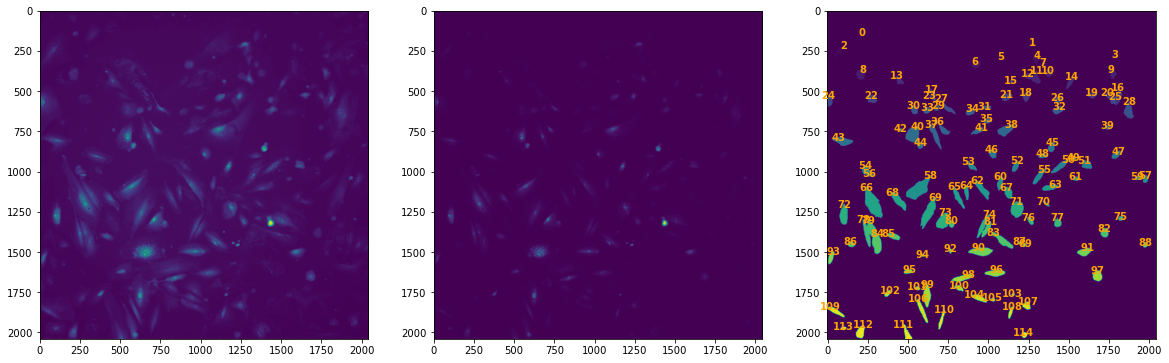

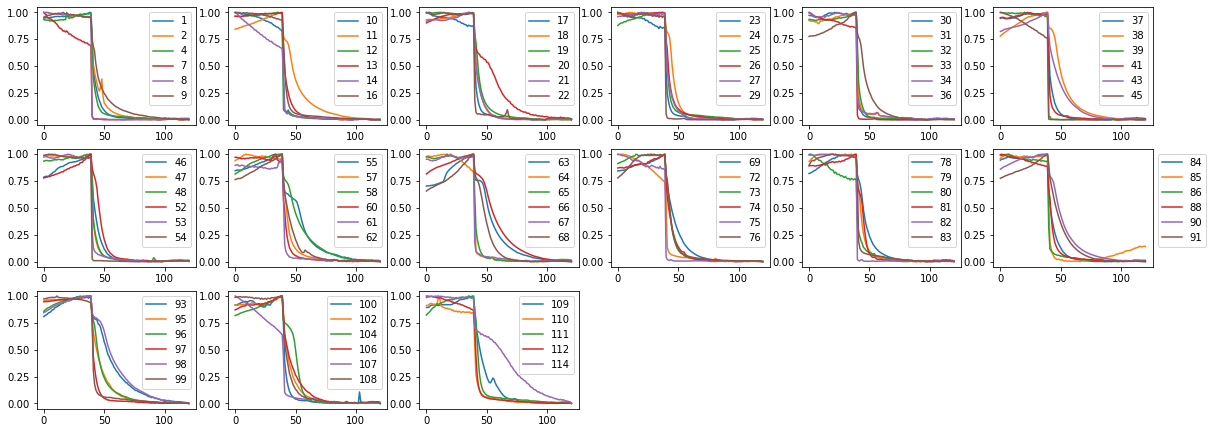

In [29]:
#Do the cell segmentation
channels= preparation(path, fileNames)
fileName = fileNames[0]
imgs=util.ReadImg(path + fileName)
masks= cellsegmentation(imgs, display=True)

celldetectionanalysis(channels, masks)
calciumtransients(channels,fileName=fileName)
newTracesMap= screencells(channels,minCellSize=600,display=True)

# 1mM_Ca_NFAT_EGTA_Field3

In [9]:
# specify image file path, name, and channels
path = "/home/ekrueger2/microscopy_data/NFAT_translocation_and_relaxation/4_15_22/Time_Series/EGTA/1mM_Ca/"
fileNames = ["1mM_Ca_NFAT_EGTA_Field3.tif"]
channel_names = ["channel1"]

Reversing time index
Returning an array of size (121, 2040, 2040)


/tmp/ipykernel_17246/1802976768.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indices=np.array(indices)


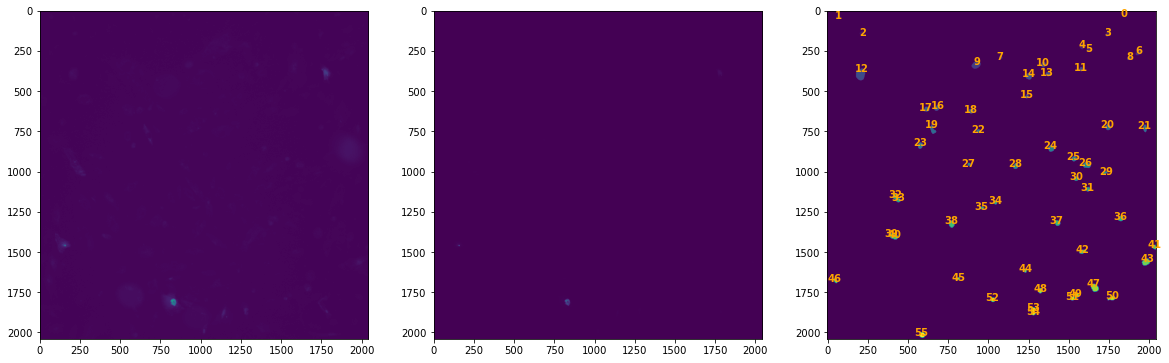

<Figure size 1440x720 with 0 Axes>

In [10]:
#Do the cell segmentation
channels= preparation(path, fileNames)
fileName = fileNames[0]
imgs=util.ReadImg(path + fileName)
masks= cellsegmentation(imgs, display=True)

celldetectionanalysis(channels, masks)
calciumtransients(channels,fileName=fileName)
newTracesMap= screencells(channels,minCellSize=600,display=True)

# 1mM_Ca_Calcium_Iono_Field3

In [9]:
# specify image file path, name, and channels
path = "/home/ekrueger2/microscopy_data/NFAT_translocation_and_relaxation/4_15_22/Time_Series/Iono/1mM_Ca/"
fileNames = ["1mM_Ca_Calcium_Iono_Field3.tif"]
channel_names = ["channel1"]

Reversing time index
Returning an array of size (121, 2040, 2040)


/tmp/ipykernel_17370/1802976768.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indices=np.array(indices)


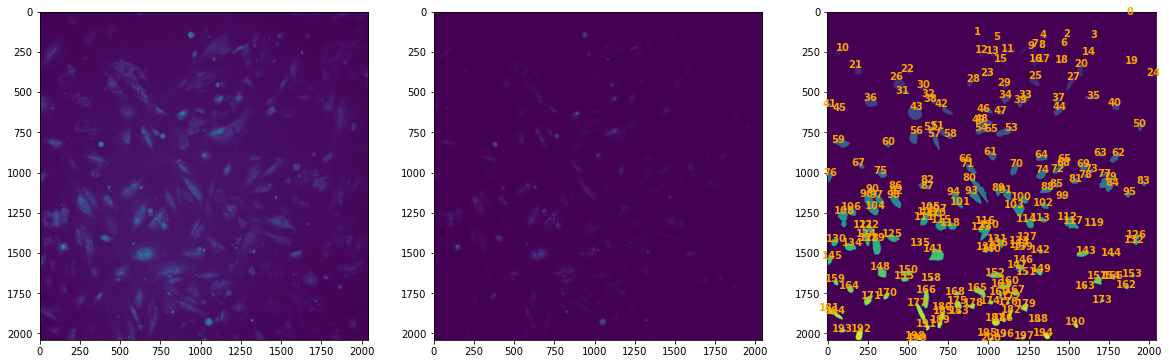

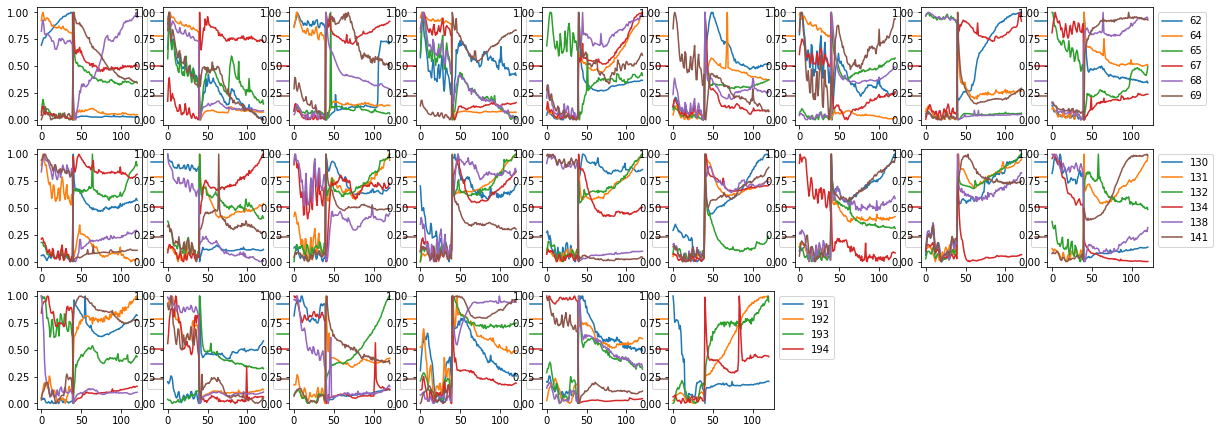

In [10]:
#Do the cell segmentation
channels= preparation(path, fileNames)
fileName = fileNames[0]
imgs=util.ReadImg(path + fileName)
masks= cellsegmentation(imgs, display=True)

celldetectionanalysis(channels, masks)
calciumtransients(channels,fileName=fileName)
newTracesMap= screencells(channels,minCellSize=600,display=True)

# 1mM_Ca_NFAT_Iono_Field3

In [9]:
# specify image file path, name, and channels
path = "/home/ekrueger2/microscopy_data/NFAT_translocation_and_relaxation/4_15_22/Time_Series/Iono/1mM_Ca/"
fileNames = ["1mM_Ca_NFAT_Iono_Field3.tif"]
channel_names = ["channel1"]

Reversing time index
Returning an array of size (121, 2040, 2040)


/tmp/ipykernel_19416/1802976768.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indices=np.array(indices)


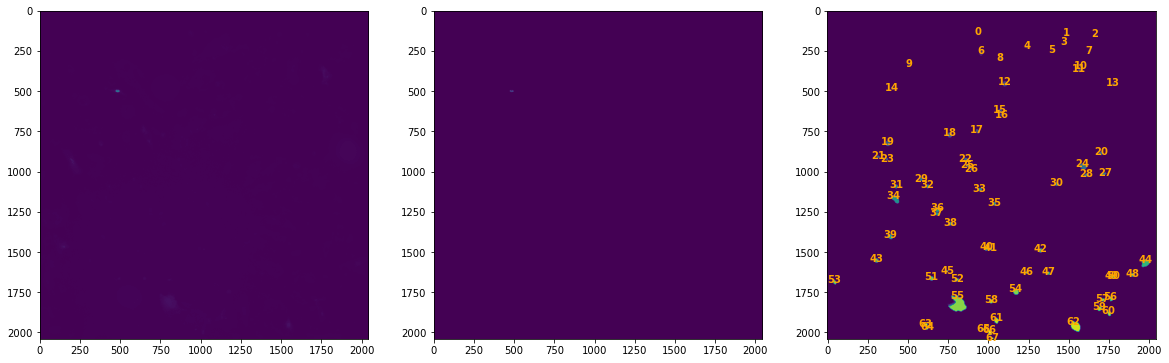

<Figure size 1440x720 with 0 Axes>

In [10]:
#Do the cell segmentation
channels= preparation(path, fileNames)
fileName = fileNames[0]
imgs=util.ReadImg(path + fileName)
masks= cellsegmentation(imgs, display=True)

celldetectionanalysis(channels, masks)
calciumtransients(channels,fileName=fileName)
newTracesMap= screencells(channels,minCellSize=600,display=True)

# 2mM_Ca_Calcium_EGTA_Field2

In [10]:
# specify image file path, name, and channels
path = "/home/ekrueger2/microscopy_data/NFAT_translocation_and_relaxation/4_15_22/Time_Series/EGTA/2mM_Ca/"
fileNames = ["2mM_Ca_Calcium_EGTA_Field2.tif"]
channel_names = ["channel1"]

Reversing time index
Returning an array of size (121, 2040, 2040)


/tmp/ipykernel_19733/1802976768.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indices=np.array(indices)


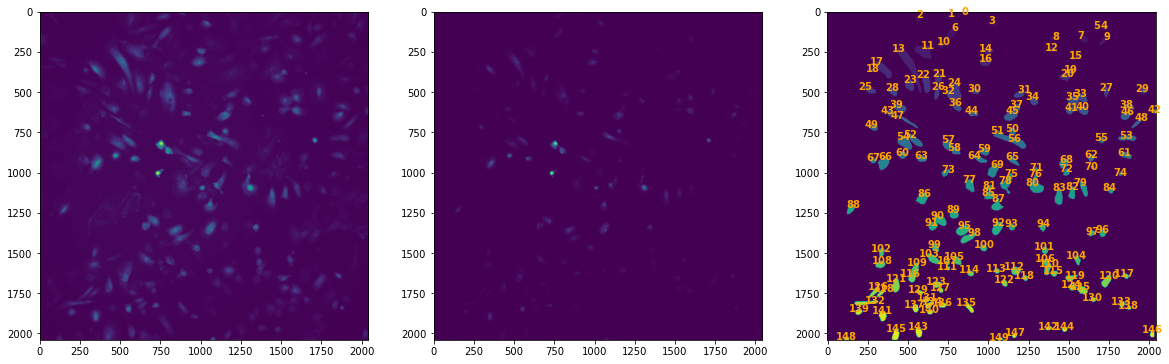

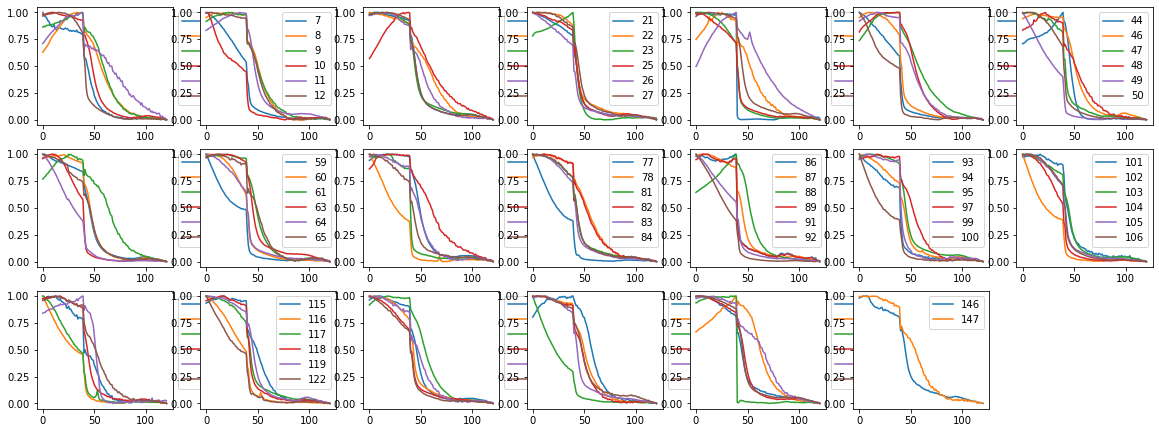

In [11]:
#Do the cell segmentation
channels= preparation(path, fileNames)
fileName = fileNames[0]
imgs=util.ReadImg(path + fileName)
masks= cellsegmentation(imgs, display=True)

celldetectionanalysis(channels, masks)
calciumtransients(channels,fileName=fileName)
newTracesMap= screencells(channels,minCellSize=600,display=True)

# 2mM_Ca_NFAT_EGTA_Field2

In [9]:
# specify image file path, name, and channels
path = "/home/ekrueger2/microscopy_data/NFAT_translocation_and_relaxation/4_15_22/Time_Series/EGTA/2mM_Ca/"
fileNames = ["2mM_Ca_NFAT_EGTA_Field2.tif"]
channel_names = ["channel1"]

Reversing time index
Returning an array of size (121, 2040, 2040)


/tmp/ipykernel_20561/1802976768.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indices=np.array(indices)


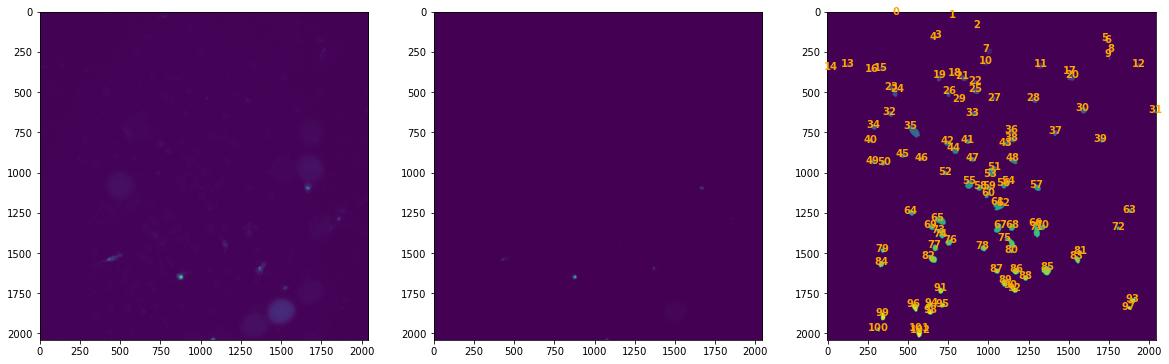

<Figure size 1440x720 with 0 Axes>

In [10]:
#Do the cell segmentation
channels= preparation(path, fileNames)
fileName = fileNames[0]
imgs=util.ReadImg(path + fileName)
masks= cellsegmentation(imgs, display=True)

celldetectionanalysis(channels, masks)
calciumtransients(channels,fileName=fileName)
newTracesMap= screencells(channels,minCellSize=600,display=True)

# 2mM_Ca_Calcium_Iono_Field2

In [9]:
# specify image file path, name, and channels
path = "/home/ekrueger2/microscopy_data/NFAT_translocation_and_relaxation/4_15_22/Time_Series/Iono/2mM_Ca/"
fileNames = ["2mM_Ca_Calcium_Iono_Field2.tif"]
channel_names = ["channel1"]

Reversing time index
Returning an array of size (121, 2040, 2040)


/tmp/ipykernel_20713/1802976768.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indices=np.array(indices)


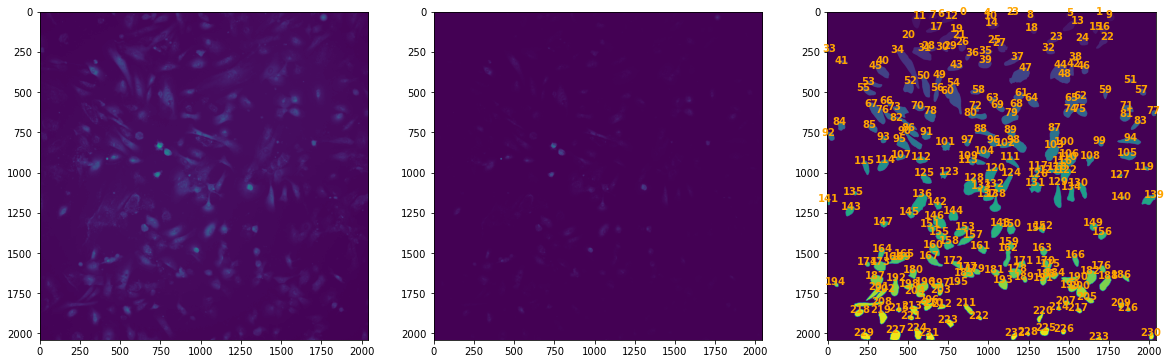

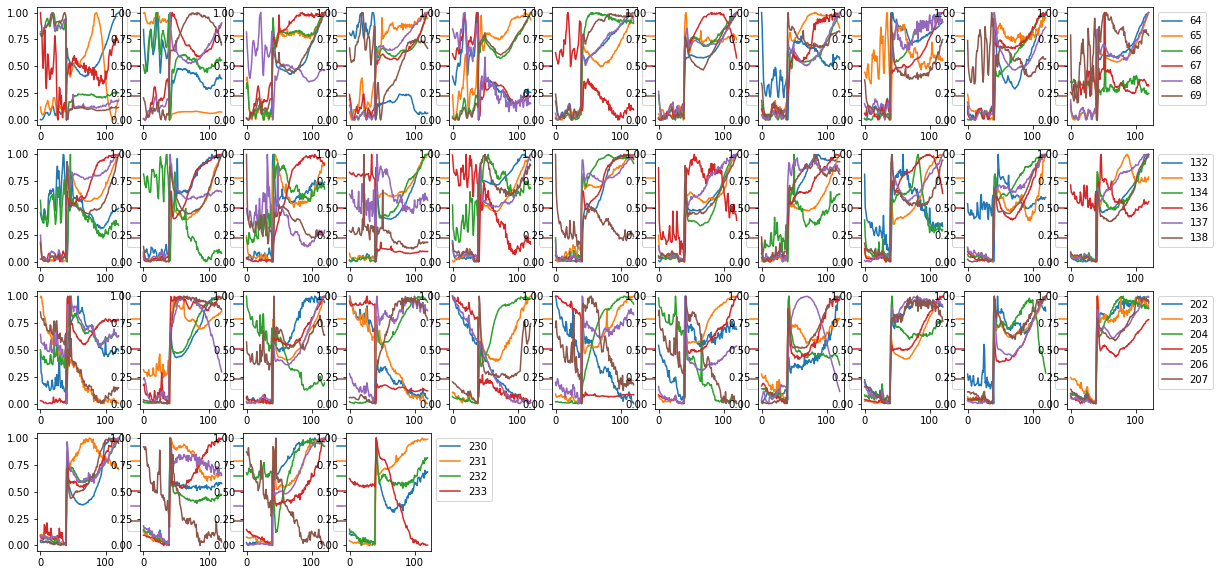

In [10]:
#Do the cell segmentation
channels= preparation(path, fileNames)
fileName = fileNames[0]
imgs=util.ReadImg(path + fileName)
masks= cellsegmentation(imgs, display=True)

celldetectionanalysis(channels, masks)
calciumtransients(channels,fileName=fileName)
newTracesMap= screencells(channels,minCellSize=600,display=True)

# 2mM_Ca_NFAT_Iono_Field2

In [9]:
# specify image file path, name, and channels
path = "/home/ekrueger2/microscopy_data/NFAT_translocation_and_relaxation/4_15_22/Time_Series/Iono/2mM_Ca/"
fileNames = ["2mM_Ca_NFAT_Iono_Field2.tif"]
channel_names = ["channel1"]

Reversing time index
Returning an array of size (121, 2040, 2040)


/tmp/ipykernel_20870/1802976768.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indices=np.array(indices)


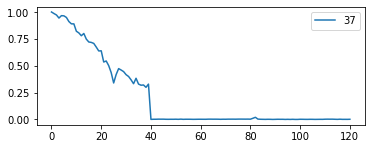

In [10]:
#Do the cell segmentation
channels= preparation(path, fileNames)
fileName = fileNames[0]
imgs=util.ReadImg(path + fileName)
masks= cellsegmentation(imgs, display=True)

celldetectionanalysis(channels, masks)
calciumtransients(channels,fileName=fileName)
newTracesMap= screencells(channels,minCellSize=600,display=True)

# 1mM_Ca_Calcium_Iono_Field3 (EX. Plot Relevant Data)

In [70]:
# specify image file path, name, and channels
path = "/home/ekrueger2/microscopy_data/NFAT_translocation_and_relaxation/4_15_22/Time_Series/Iono/1mM_Ca/"
fileNames = ["1mM_Ca_Calcium_Iono_Field3.tif"]
channel_names = ["channel1"]

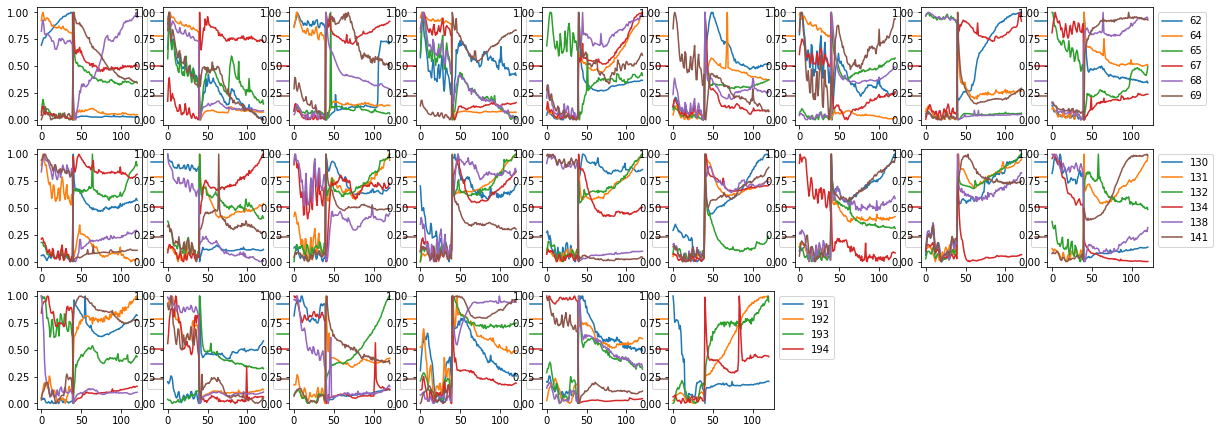

In [73]:
#Do the cell segmentation
channels= preparation(path, fileNames)
fileName = fileNames[0]
imgs=util.ReadImg(path + fileName)
masks= cellsegmentation(imgs, display=True)

celldetectionanalysis(channels, masks)
calciumtransients(channels,fileName=fileName)
newTracesMap= screencells(channels,minCellSize=600,display=True)

In [94]:
#plotting normalized data and setting certain rules for what would be important/relevant
channel = channels["channel1"]
traceIdx= newTracesMap[2]

for traceIdx in newTracesMap:
    #print(traceIdx)
    trace = channel.traces[traceIdx]
    #lt.plot(trace)
    mymean= np.mean(trace[0:30]) #Values before Iono added
    shifted= trace-mymean

    normalized= shifted/np.max(shifted)

    mymean2 = np.mean(normalized[60:120]) #Values after Iono added
    mymean= np.mean(normalized[0:30])
    #print(mymean)
    #print(mymean2)
    if mymean2 > 0.3:
       plt.plot(normalized)